In [1]:
# Data manipulation
#==============================================================================
import pandas as pd
import numpy as np

# Data visualization
#==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns

# Stats
#==============================================================================
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
# import ppscore as pps

# Data preprocessing
#==============================================================================
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
# Models
#==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
# from catboost import CatBoostClassifier

# Metrics
#==============================================================================
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# tqdm
#==============================================================================
from tqdm.notebook import tqdm_notebook

# warnings
#==============================================================================
import warnings
warnings.filterwarnings('ignore')


In [3]:
flood = pd.read_csv("/content/FloodPred.csv", nrows=1000)
flood.head(5)

,id,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,0,5,8,5,8,6,4,4,3,3,...,5,3,3,5,4,7,5,7,3,0.445
1,1,6,7,4,4,8,8,3,5,4,...,7,2,0,3,5,3,3,4,3,0.450
2,2,6,5,6,7,3,7,1,5,4,...,7,3,7,5,6,8,2,3,3,0.530
3,3,3,4,6,5,4,8,4,7,6,...,2,4,7,4,4,6,5,7,5,0.535
4,4,5,3,2,6,4,4,3,3,3,...,2,2,6,6,4,1,2,3,5,0.415


In [4]:
# flood.size
# flood.info()

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
X = flood.drop('FloodProbability', axis=1)
y = flood['FloodProbability']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model performance (e.g., using R-squared)

r2 = r2_score(y_test, y_pred)
print(f"R-squared score: {r2:.3f}")

R-squared score: 0.826


The 0.826 which means the model is able to explain 82% of the variance in the target variable,which is a good start.
Now we can proceed with EDA,target variable analysis,feature improtance and PCA would be very important for this kind of data.

In [6]:
# Model building
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score
X = flood.drop('FloodProbability', axis=1)
y = flood['FloodProbability']
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform cross-validation and train the model
scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print(f"Cross-validation R-squared scores: {scores}")
print(f"Mean R-squared score: {scores.mean():.3f}")

# Fit the model on the entire training data
xgb_model.fit(X, y)

Cross-validation R-squared scores: [0.45262506 0.42504685 0.40148771 0.50400896 0.55794182]
Mean R-squared score: 0.468


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [7]:
# Predict probabilities for the entire dataset
y_pred_proba = xgb_model.predict(X)

# Create a new DataFrame with id and predicted probabilities
predictions_df = pd.DataFrame({'id': flood['id'], 'FloodProbability': y_pred_proba})

# Display the predictions
display(predictions_df.head(20))

,id,FloodProbability
0,0,0.445985
1,1,0.450425
2,2,0.529620
3,3,0.536026
4,4,0.414090
5,5,0.440954
6,6,0.459968
7,7,0.593616
8,8,0.503544
9,9,0.454639


In [8]:
def export_predictions_to_csv(predictions_df, filename):
    predictions_df.to_csv(filename, index=False)
    print(f"Predictions exported to {filename}")
    return None

# Example usage:
export_predictions_to_csv(predictions_df, "Floodprobabilities.csv")


Predictions exported to Floodprobabilities.csv


## Drought Probability Prediction

In [ ]:
# https://www.kaggle.com/code/jaymineshkumarpatel/drought-prediction-using-ml-algorithms
# https://www.kaggle.com/code/jonbown/lstm-drought-condition-prediction

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
# from pmdarima.arima import auto_arima
import statsmodels.graphics.tsaplots as splt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.stattools import adfuller

In [ ]:
drought = pd.read_csv("/content/drought.csv", nrows=1000)
drought.head(5)

,SCORE,DATE,D0,D1,D2,D3,D4,NA_COUNT,W0,W1,W2,W3,W4
0,1.1,year_0,0.0,0.0,0.0,0.0,0.0,0.0,98.9,0.0,0.0,0.0,0.0
1,92.2,year_1,7.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,6.3,year_2,93.7,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.2,year_3,96.8,71.3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,44.8,year_4,55.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
drought['Date_MOD'] = drought['DATE'].str.split('_').str[1].astype(int)

In [ ]:
# drought.dtypes

In [ ]:
# ---- Example time series (replace with your own drought_ts) ----
years = pd.date_range(start="1970", periods=20, freq="Y")
values = np.random.rand(20) * 10  # fake drought scores

drought_ts = pd.Series(values, index=years)

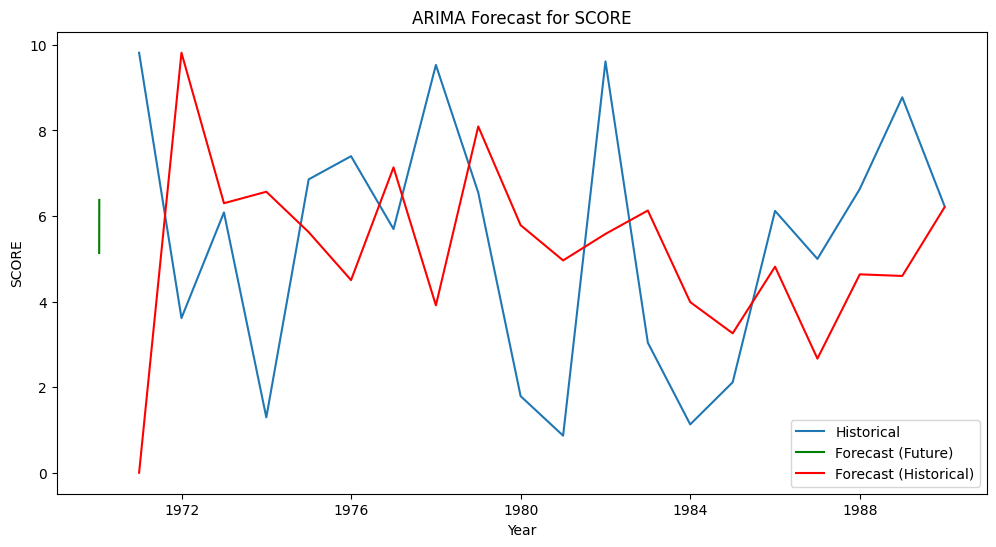

(<Figure size 1200x600 with 1 Axes>,
 <Axes: title={'center': 'ARIMA Forecast for SCORE'}, xlabel='Year', ylabel='SCORE'>)

In [ ]:
# Call function
forecast_arima(drought_ts, 0, 'SCORE')

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Define the ARIMA model and forecasting function
def forecast_arima(ts_data, start_year, var_name, tp='Historical'):
    # Fit ARIMA model
    model = ARIMA(ts_data, order=(5,1,0))
    model_fit = model.fit()

    # Make predictions for two years beyond the historical data
    forecast_steps = len(ts_data) + 2
    forecast = model_fit.predict(start=0, end=forecast_steps-1)

    # Plot historical data and forecast
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.plot(ts_data.index, ts_data, label='Historical')
    ax.plot(range(len(ts_data), forecast_steps), forecast[len(ts_data):],
            color='green', label='Forecast (Future)')
    ax.plot(ts_data.index, forecast[:len(ts_data)],
            color='red', label='Forecast (Historical)')
    ax.set_title(f'ARIMA Forecast for {var_name}')
    ax.set_xlabel('Year')
    ax.set_ylabel(var_name)
    ax.legend()

    plt.show()
    return fig, ax   # ✅ returns the chart objects

# Example call
forecast_arima(drought_ts, 0, 'SCORE')


NameError: name 'drought_ts' is not defined

In [ ]:
# Retrain the ARIMA model on the entire drought_ts data
model = ARIMA(drought_ts, order=(5,1,0))
model_fit = model.fit()

# Predict for all years in the dataset
forecast = model_fit.predict(start=0, end=len(drought_ts) - 1)

# Create a DataFrame with the predicted drought probabilities
drought_predictions_df = pd.DataFrame({'Year': drought_ts.index, 'Predicted_Drought_Score': forecast})

# Display the predictions
display(drought_predictions_df.head(20))

NameError: name 'drought_ts' is not defined

In [ ]:
# Create a time series from the drought DataFrame
drought_ts = drought.set_index('Date_MOD')['SCORE']

# Display the time series
display(drought_ts.head())

In [ ]:
import pandas as pd

# Loan probability dataset
loan_data = pd.DataFrame({
    "LoanID": ["I38PQUQS96","HPSK72WA7R","C1OZ6DPJ8Y","V2KKSFM3UN","EY08JDHTZP",
               "A9S62RQ7US","H8GXPAOS71","0HGZQKJ36W","1R0N3LGNRJ","CM9L1GTT2P",
               "IA35XVH6ZO","Y8UETC3LSG","RM6QSRHIYP","GX5YQOGROM","X0BVPZLDC0",
               "O5DM5MPPNA","ZDDRGVTEXS","9V0FJW7QPB","O1IKKLC69B","F7487UU2BF"],
    "Predicted_Prob_Default": [0.001389,0.000950,0.988873,0.001670,0.001358,
                               0.988653,0.001900,0.001055,0.988550,0.001448,
                               0.005480,0.988061,0.001396,0.001029,0.000978,
                               0.001687,0.001994,0.001386,0.989481,0.001604]
})

# Flood probability dataset
flood_data = pd.DataFrame({
    "id": list(range(20)),
    "FloodProbability": [0.445985,0.450425,0.529620,0.536026,0.414090,
                         0.440954,0.459968,0.593616,0.503544,0.454639,
                         0.515372,0.480231,0.470168,0.510662,0.485848,
                         0.431138,0.523617,0.513894,0.560220,0.554899]
})

# Merge datasets on index
merged = loan_data.merge(flood_data, left_index=True, right_on="id")

# Define thresholds for "high risk"
high_default = 0.5
high_flood = 0.5

# Filter rows where both risks are high
high_risk = merged[(merged["Predicted_Prob_Default"] > high_default) &
                   (merged["FloodProbability"] > high_flood)]

print("Merged dataset:")
print(merged)

print("\nHigh-risk cases (both loan default and flood):")
print(high_risk)


Merged dataset:
        LoanID  Predicted_Prob_Default  id  FloodProbability
0   I38PQUQS96                0.001389   0          0.445985
1   HPSK72WA7R                0.000950   1          0.450425
2   C1OZ6DPJ8Y                0.988873   2          0.529620
3   V2KKSFM3UN                0.001670   3          0.536026
4   EY08JDHTZP                0.001358   4          0.414090
5   A9S62RQ7US                0.988653   5          0.440954
6   H8GXPAOS71                0.001900   6          0.459968
7   0HGZQKJ36W                0.001055   7          0.593616
8   1R0N3LGNRJ                0.988550   8          0.503544
9   CM9L1GTT2P                0.001448   9          0.454639
10  IA35XVH6ZO                0.005480  10          0.515372
11  Y8UETC3LSG                0.988061  11          0.480231
12  RM6QSRHIYP                0.001396  12          0.470168
13  GX5YQOGROM                0.001029  13          0.510662
14  X0BVPZLDC0                0.000978  14          0.485848
15  O5DM

In [ ]:
import pandas as pd

def merge_and_find_high_risk(loan_csv, flood_csv,
                             default_threshold=0.5, flood_threshold=0.5):
    """
    Merge loan default probabilities with flood probabilities and
    return high-risk matches where both are above thresholds.

    Parameters:
    -----------
    loan_csv : str
        Path to loan dataset CSV (must contain 'LoanID' and 'Predicted_Prob_Default').
    flood_csv : str
        Path to flood dataset CSV (must contain 'id' and 'FloodProbability').
    default_threshold : float, optional
        Threshold for high default probability (default = 0.5).
    flood_threshold : float, optional
        Threshold for high flood probability (default = 0.5).

    Returns:
    --------
    merged : pd.DataFrame
        Full merged dataset.
    high_risk : pd.DataFrame
        Subset where both default and flood probabilities are high.
    """

    # Load data
    loan_data = pd.read_csv(loan_csv)
    flood_data = pd.read_csv(flood_csv)

    # Merge datasets on index (assumes same order of records)
    merged = loan_data.merge(flood_data, left_index=True, right_on="id")

    # Filter high-risk matches
    high_risk = merged[
        (merged["Predicted_Prob_Default"] > default_threshold) &
        (merged["FloodProbability"] > flood_threshold)
    ]

    return merged, high_risk


# Example usage:
# merged_df, high_risk_df = merge_and_find_high_risk("loan_probs.csv", "flood_probs.csv")
# print("High-risk matches:\n", high_risk_df)
